In [15]:
# data set https://www.gushiciku.cn/dl/0prAT/zh-tw
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt
from IPython.display import clear_output
from pydicom import dcmread

In [16]:
# source: https://pycad.co/nifti2dicom/
def nifti2dicom_1file(nifti_dir, out_dir):
    """
    This function is to convert only one nifti file into dicom series
    `nifti_dir`: the path to the one nifti file
    `out_dir`: the path to output
    """

    nifti_file = nib.load(nifti_dir)
    nifti_array = nifti_file.get_fdata()
    number_slices = nifti_array.shape[2]

    for slice_ in range(number_slices):
        convertNsave(nifti_array[:,:,slice_], out_dir, slice_)

In [17]:
def convertNsave(arr,file_dir, index=0):
    """
    `arr`: parameter will take a numpy array that represents only one slice.
    `file_dir`: parameter will take the path to save the slices
    `index`: parameter will represent the index of the slice, so this parameter will be used to put 
    the name of each slice while using a for loop to convert all the slices
    """
    
    dicom_file = dcmread('/Users/eileenwang/Desktop/test.dcm')
    arr = arr.astype('uint16')
    dicom_file.Rows = arr.shape[0]
    dicom_file.Columns = arr.shape[1]
    dicom_file.PhotometricInterpretation = "MONOCHROME2"
    dicom_file.SamplesPerPixel = 1
    dicom_file.BitsStored = 16
    dicom_file.BitsAllocated = 16
    dicom_file.HighBit = 15
    dicom_file.PixelRepresentation = 1
    dicom_file.PixelData = arr.tobytes()
    dicom_file.save_as(os.path.join(file_dir, f'slice{index}.dcm'))

In [18]:
# nii to dcm
nifti2dicom_1file("/Users/eileenwang/Downloads/Task06_Lung/imagesTr/lung_010.nii.gz","/Users/eileenwang/Downloads/Task06_Lung/imagesTr/lung_010")

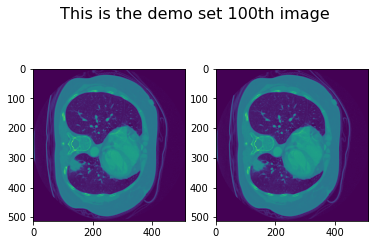

In [21]:

nii = nib.load('/Users/eileenwang/Downloads/Task06_Lung/imagesTr/lung_010.nii.gz')

for i in range(85,100):
    dcm = dcmread(f"/Users/eileenwang/Downloads/Task06_Lung/imagesTr/lung_010/slice{i}.dcm")
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(dcm.pixel_array)
    ax[1].imshow(nii.dataobj[:,:,i])
    fig.suptitle(f'This is the demo set {i+1}th image', fontsize=16)
    plt.show()
    clear_output(wait  = True)

In [ ]:
# check image with groundtruth mask

In [8]:
# data set from Medical Segmentation Decathlon - Task 6 Lung -- https://drive.google.com/drive/folders/1HqEgzS8BV2c7xYNrZdEAnrHk7osJJ--2
# http://medicaldecathlon.com/
nii = nib.load('/Users/eileenwang/Downloads/Task06_Lung/imagesTr/lung_010.nii.gz')
groundTruth = nib.load("/Users/eileenwang/Downloads/Task06_Lung/labelsTr/lung_010.nii.gz")
print(nii.shape, groundTruth.shape)

(512, 512, 241) (512, 512, 241)


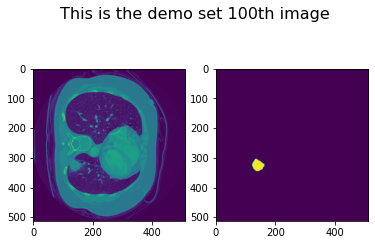

In [12]:
for i in range(85,100):
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(nii.dataobj[:,:,i])
    ax[1].imshow(groundTruth.dataobj[:,:,i])
    fig.suptitle(f'This is the demo set {i+1}th image', fontsize=16)
    plt.show()
    clear_output(wait  = True)

(array([327, 327, 327, 327, 328, 328, 328, 328, 329, 329, 329, 329]), array([121, 122, 123, 124, 121, 122, 123, 124, 121, 122, 123, 124]))
[1 1 1 1 0]


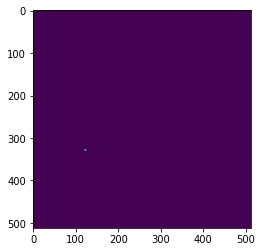

In [13]:
plt.imshow(groundTruth.dataobj[:,:,87])
print(np.where(groundTruth.dataobj[:,:,87]==1))
print(groundTruth.dataobj[:,:,87][327][121:126])

In [14]:
# https://github.com/Ola-Vish/lung-tumor-segmentation